<a href="https://colab.research.google.com/github/MarcoCarnaghi-fi/UNS_Aprendizaje_Maquina_2021/blob/main/TP2_Ej1_Carnaghi_CondicionSanitariaBahiaBlanca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio N°1: Condición Sanitaria en Bahia Blanca

En este notebook vamos a graficar y analizar muestras de la condición sanitaria relacionadas a Casos de Covid y disponibilidad de Camas a fin de detectar comportamientos anómalos y distribuciones con formas estándares.

#Carga de los datos

In [ ]:
#Para el parsing
import re
#Para recuperar informacion del txt
import requests

# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
#Recuperacion de informacion
source_data_url_1 = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv'
source_data_url_2 = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv' 

df_camas = pd.read_csv(source_data_url_1)
df_casos = pd.read_csv(source_data_url_2)

In [ ]:
df_camas = df_camas.drop(columns='observaciones')
df_camas

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3


In [ ]:
df_casos

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


#Visualización y Análisis del DataFrame "Camas"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


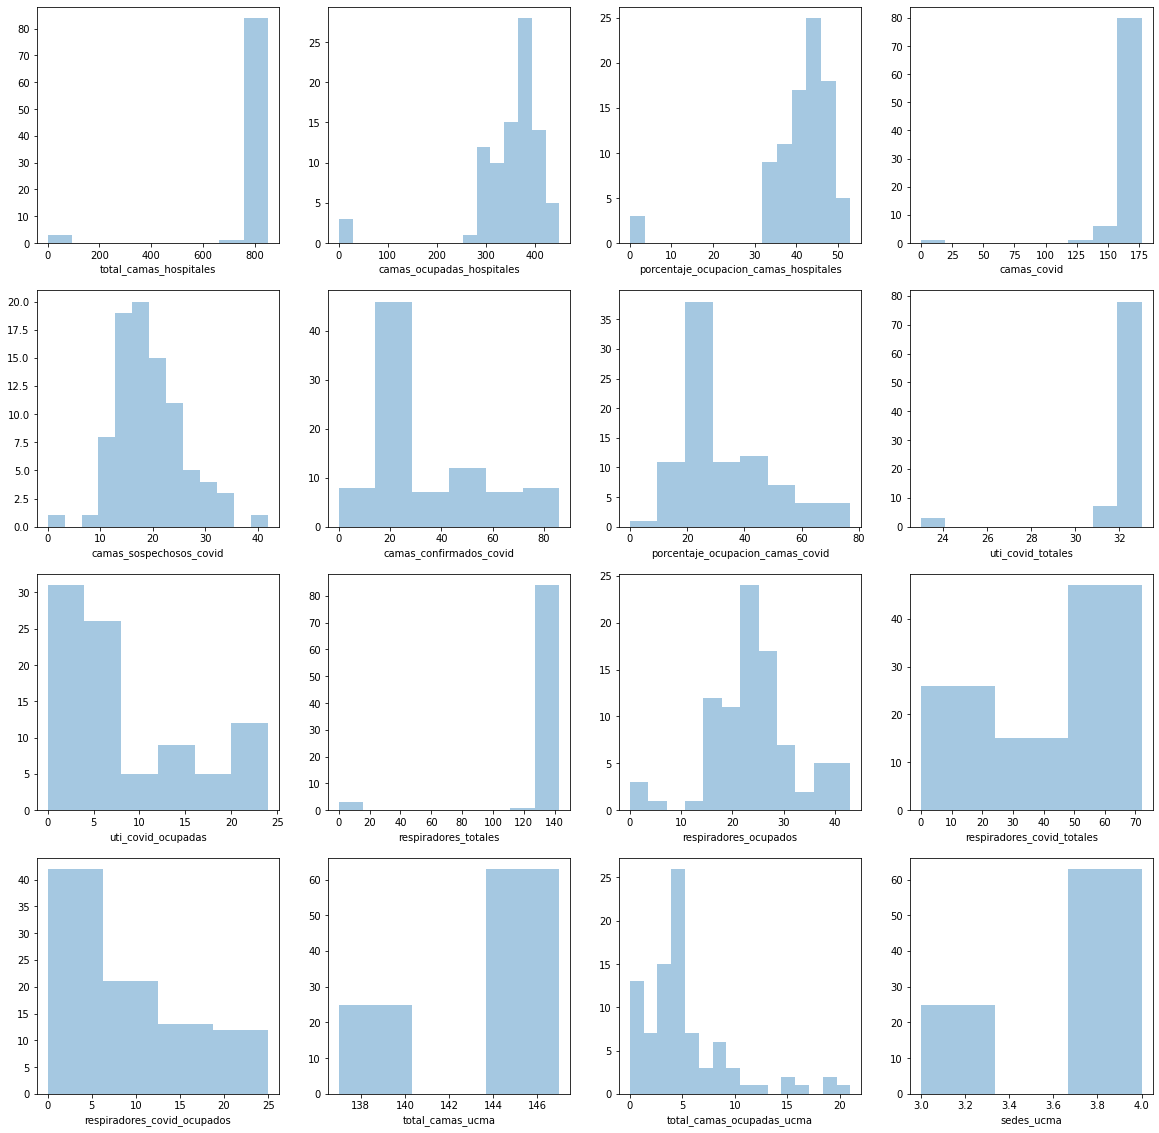

In [ ]:
# Trace el histograma de distribución y resalte los valores atípicos en rojo
df_camas_cut = df_camas.drop(columns= df_camas.columns[:2])


plt.figure(figsize=(20,20))
for i in range(len(df_camas_cut.columns)):
  ax=plt.subplot(4, 4, i+1)
  feature = df_camas_cut.columns[i]
  sns.distplot(df_camas_cut[feature], kde=False, ax=ax);

En base a lo observado en los histogramas previos, podriamos asumir distribuciones aproximadamente gaussianas en las columnas de __respiradores_ocupados__ y __sospechosos_de_covid__ .


Por otra parte, en comportamiento destacados podemos observar una fuerte correlación en la distribución de __total_camas_ucma__ y __sedes_ucma__, de igual forma para __total_camas_hospitales__, __camas_covid__ y __respiradores_totales__ .


Veamos más detenidamente los dos atributos candidaos a gaussianos...

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,respiradores_ocupados,camas_sospechosos_covid
count,88.000000,88.000000
mean,24.284091,19.647727
std,8.541917,6.586367
min,0.000000,0.000000
25%,20.000000,15.750000
50%,25.000000,18.000000
75%,28.000000,23.000000
max,43.000000,42.000000


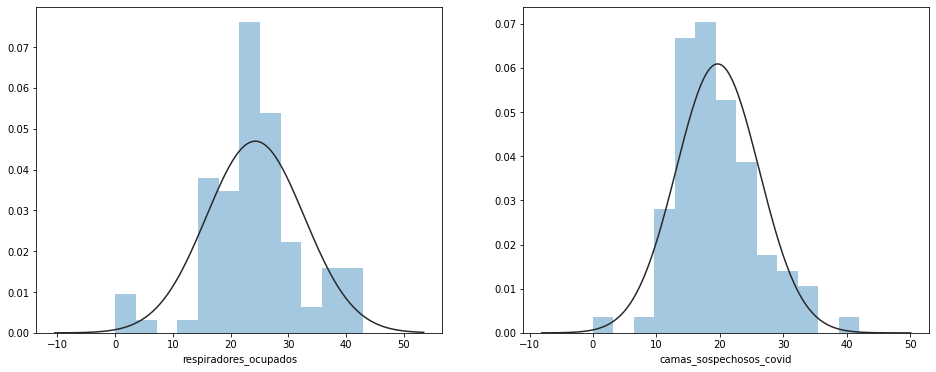

In [ ]:
# Normal fitting for reference curve
from scipy.stats import norm

# Plot the distribution histogram and highlight outliers in red
plt.figure(figsize=(16,6))
ax1=plt.subplot(1,2, 1)
sns.distplot(df_camas_cut['respiradores_ocupados'], fit=norm ,kde=False, ax=ax1);
ax2=plt.subplot(1,2, 2)
sns.distplot(df_camas_cut['camas_sospechosos_covid'], fit=norm ,kde=False, ax=ax2);

df_camas_gauss = df_camas_cut[['respiradores_ocupados','camas_sospechosos_covid']]
df_camas_gauss.describe()

A continuación, analizamos el atributo camas_ocupadas_hospitales (y por lo tanto, porcentaje_camas_ocupadas_hospitales).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


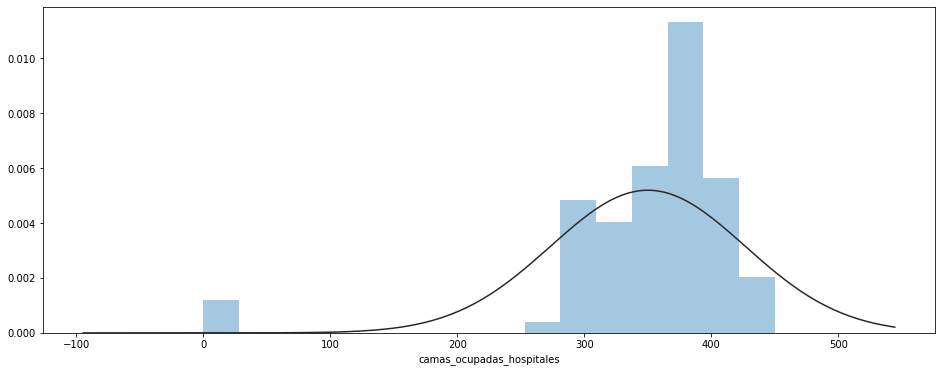

In [ ]:
#Analizamos el atributo camas_ocupadas_hospitales (y por lo tanto, porcentaje_camas_ocupadas_hospitales)
plt.figure(figsize=(16,6))
sns.distplot(df_camas_cut['camas_ocupadas_hospitales'], fit=norm ,kde=False);

Zeros:
7     0
12    0
16    0
Name: camas_ocupadas_hospitales, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


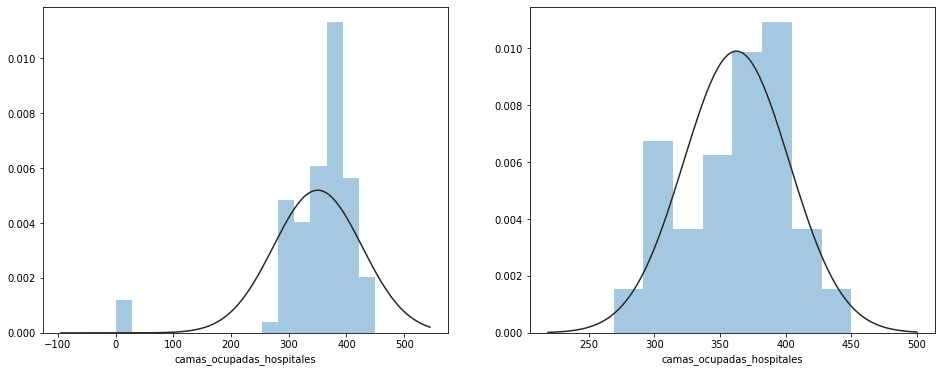

In [ ]:
#Hagamos una mascara para eliminar los casos de cero que generan una distorsion en la distribucion
feature = 'camas_ocupadas_hospitales'
zeros_mask = [True if x == 0 else False for x in df_camas_cut[feature]]
print("Zeros:\n{}".format(df_camas_cut[feature][zeros_mask]) )

df_camas_mod = df_camas_cut
df_camas_mod["zeros"]  = pd.Series(zeros_mask, dtype="bool")
df_camas_mod = df_camas_mod.loc[df_camas_mod['zeros'] == False]


#Comparemos con la anterior
# Plot the distribution histogram and highlight outliers in red
plt.figure(figsize=(16,6))
ax1=plt.subplot(1,2, 1)
sns.distplot(df_camas_cut[feature], fit=norm ,kde=False, ax=ax1);
ax2=plt.subplot(1,2, 2)
sns.distplot(df_camas_mod[feature], fit=norm ,kde=False, ax=ax2);


Sin embargo, aún eliminando estos valores atípicos, vemos que la distribución no es tan fiel a una distribución gaussiana.


Pasemos al siguiente DataFrame

### Analizando otras distribuciones posibles

Se identifica de forma visual que las variables:

* Total camas ocupadas ucma
* Respiradores ocupados

podrian responder a distribuciones de poisson.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/495px-Poisson_pmf.svg.png" alt="Poisson Dist">



Analicemos ambas variables ...

#### Total Camas ocupadas ucma

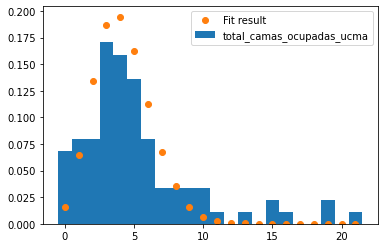

El mu de la Distribucion de Poisson asociada a  "total_camas_ocupadas_ucma" es: 4.171447899532779


In [ ]:
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

# get data for poisson pmf
data = df_camas_cut['total_camas_ocupadas_ucma'];

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(23) -0.5
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='total_camas_ocupadas_ucma')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
#The idea is to determine the parameters that minimize the sum of the squared residuals of fit_function - bin = "aproximation function output" - "real y data"
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 22)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()

mu_total_camas = parameters
print('El mu de la Distribucion de Poisson asociada a  "total_camas_ocupadas_ucma" es: {}'.format(mu_total_camas[0]))

Se observa que el matching no es perfecto pero existe cierta similitud.

#### Respiradores covid ocupados 

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


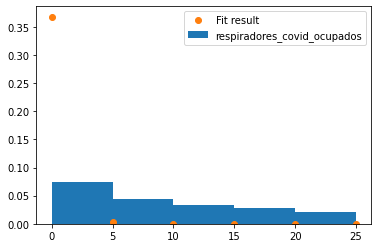

El mu de la Distribucion de Poisson asociada a  "respiradores_covid_ocupados" es: 1.0


In [ ]:
# get data for poisson pmf
data = df_camas_cut['respiradores_covid_ocupados'];

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(0,30,5) 
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='respiradores_covid_ocupados')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
#The idea is to determine the parameters that minimize the sum of the squared residuals of fit_function - bin = "aproximation function output" - "real y data"
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 30,5) 

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()

mu_respiradores = parameters
print('El mu de la Distribucion de Poisson asociada a  "respiradores_covid_ocupados" es: {}'.format(mu_respiradores[0]))

Se observa que si bien la densidad de probabilidad decae con el nro de camas ocupadas, este comportamiento es más próximo a un decaimiento lineal que exponenecial. Por lo tanto, no hay una correcta aproximación mediante una distribución de Poisson.

## Visualización y análisis del Dataframe "Casos"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


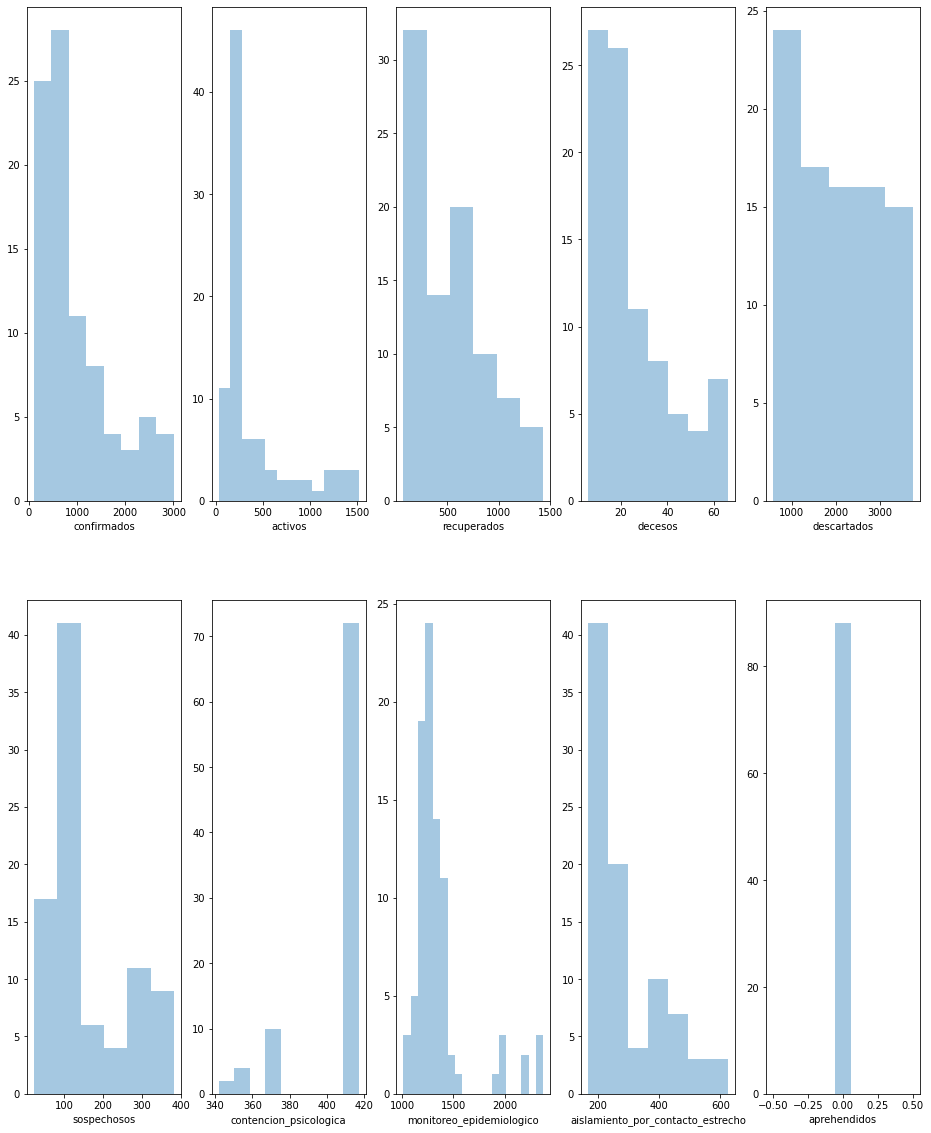

In [ ]:
# Trace el histograma de distribución y resalte los valores atípicos en rojo
#df_casos = df_casos.drop(columns=['fecha'])
plt.figure(figsize=(16,20))
for i in range(len(df_casos.columns)):
  ax=plt.subplot(2, 5, i+1)
  feature = df_casos.columns[i]
  sns.distplot(df_casos[feature], kde=False, ax=ax);

En principio, no se observa ningun campo que pueda considerarse con una distribución gaussiana. Veamos el fitting a distribución normal...

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

LinAlgError: ignored

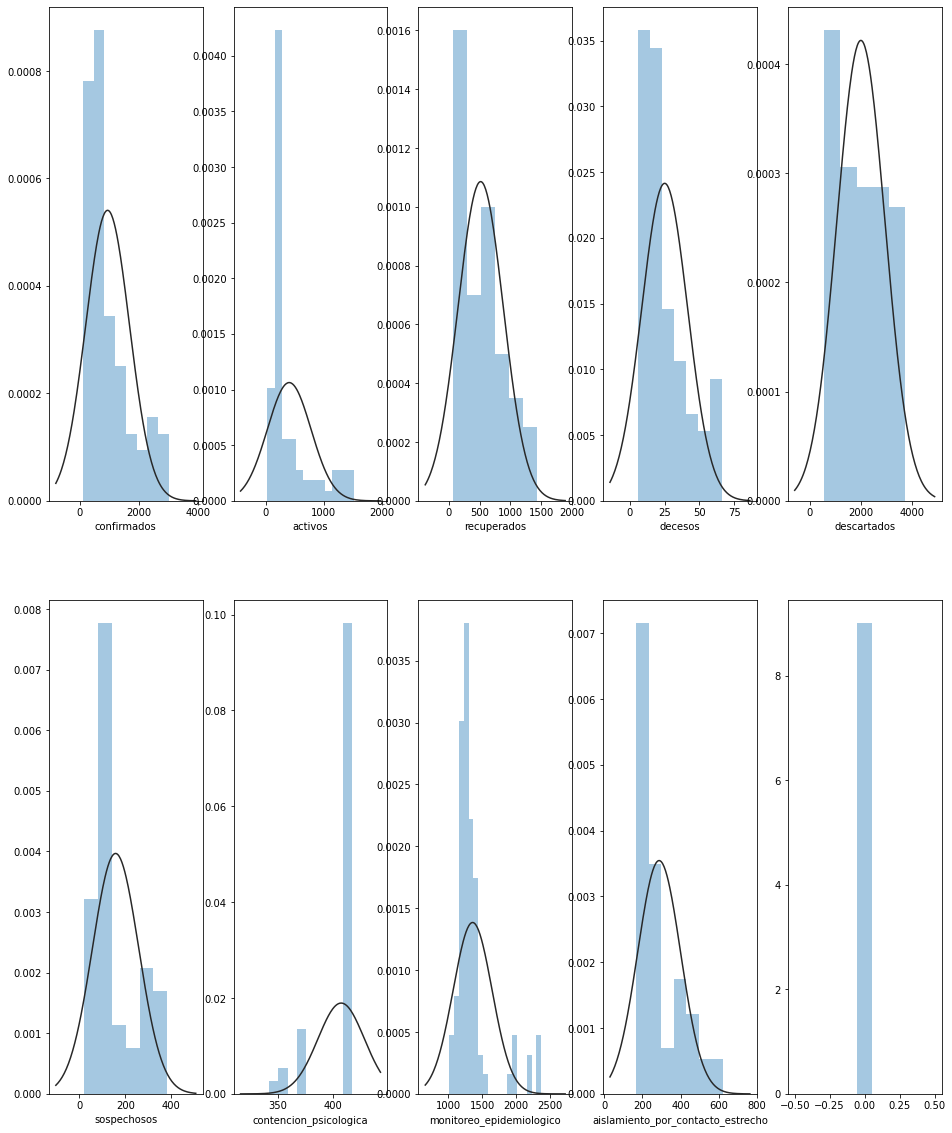

In [ ]:
plt.figure(figsize=(16,20))
for i in range(len(df_casos.columns)):
  ax=plt.subplot(2, 5, i+1)
  feature = df_casos.columns[i]
  sns.distplot(df_casos[feature], fit=norm,kde=False, ax=ax);

Estos gráficos _respaldan_ la observación previa.

El comportamiento atípico aquí se da en __aprehendidos__ que solo toma el valor 0.


De igual forma a lo realizado en el DataFrame previo podemos analizar la compatibilidad con la distribución de Poisson de algunas de las variables, por ejemplo

In [ ]:
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)

def fit_poisson(in_data, in_bins_start, in_bins_end, in_bins_step,in_bins_offset, in_ylim):
  # get data for poisson pmf
  data = in_data;

  # the bins should be of integer width, because poisson is an integer distribution
  bins = np.arange(in_bins_start, in_bins_end, in_bins_step) + in_bins_offset
  entries, bin_edges, patches = plt.hist(data, bins=bins, density=True)
  print(entries)
  # calculate bin centres
  bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])
  
  # fit with curve_fit
  #The idea is to determine the parameters that minimize the sum of the squared residuals of fit_function - bin = "aproximation function output" - "real y data"
  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
  parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

  # plot poisson-deviation with fitted parameter
  x_plot = np.arange(in_bins_start, in_bins_end, in_bins_step)

  plt.plot(
      x_plot,
      fit_function(x_plot, *parameters),
      marker='o', linestyle='',
      label='Fit result',
  )
  plt.ylim([0,in_ylim])
  plt.legend()
  plt.show()

  return parameters
#print('El mu de la Distribucion de Poisson asociada a  "{}" es: {}'.format(mu_total_camas[0]))

[0.         0.00046512 0.00081395 0.00081395 0.0005814  0.00093023
 0.00093023 0.00081395 0.00104651 0.00034884 0.00034884 0.00023256
 0.00023256 0.00046512 0.00023256 0.00011628 0.00011628 0.00011628
 0.00023256 0.00011628 0.00011628 0.         0.00011628 0.00011628
 0.00023256 0.00011628 0.00011628 0.00011628 0.00011628]


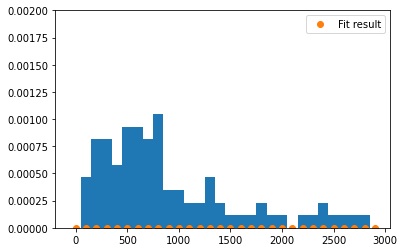

array([17.000001])

In [ ]:
mu_confirmados = fit_poisson(df_casos['confirmados'], 0, 3000, 100,-50, 0.002)
mu_confirmados

[0.00094118 0.00423529 0.00176471 0.00023529 0.00070588 0.00023529
 0.00023529 0.00023529 0.00011765 0.00011765 0.00011765 0.00035294
 0.00023529 0.00011765 0.00035294 0.         0.         0.
 0.         0.        ]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


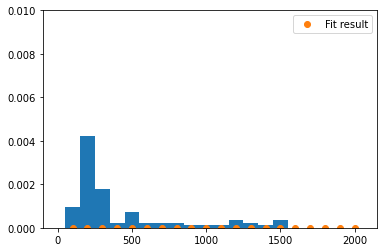

In [ ]:
mu_activos = fit_poisson(df_casos['activos'], 0, 2100, 100,50, 0.01)

[0.00022727 0.00045455 0.00295455 0.00329545 0.00170455 0.00034091
 0.         0.         0.         0.00011364 0.00034091 0.
 0.00022727 0.00011364 0.00022727 0.        ]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


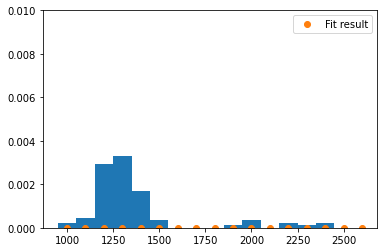

array([1.])

In [ ]:
mu_activos = fit_poisson(df_casos['monitoreo_epidemiologico'], 1000, 2700, 100,-50, 0.01)
mu_activos

(array([0.18604651, 0.79069767, 1.06976744, 0.79069767, 0.60465116,
        0.09302326, 0.04651163, 0.        , 0.        , 0.        ,
        0.        , 0.04651163, 0.09302326, 0.04651163, 0.        ,
        0.09302326, 0.        , 0.09302326, 0.04651163]),
 array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
         1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,
         3.5 ,  3.75]),
 <a list of 19 Patch objects>)

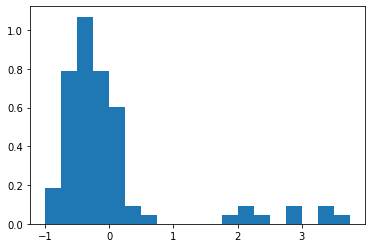

In [ ]:
from sklearn.preprocessing import scale
monitoreo_std = scale(df_casos['monitoreo_epidemiologico'],axis=0, with_mean=True, with_std=True, copy=True);

bins = np.arange(-1,4,0.25);
plt.hist(monitoreo_std, bins=bins, density=True)

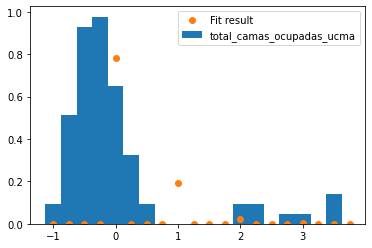

array([0.])

In [ ]:
#mu_activos = fit_poisson(monitoreo_std, -1,4, 0.25,-0.125, 1)

# get data for poisson pmf
data =monitoreo_std

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(-1,4,0.25) -0.125
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='total_camas_ocupadas_ucma')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# fit with curve_fit
#The idea is to determine the parameters that minimize the sum of the squared residuals of fit_function - bin = "aproximation function output" - "real y data"
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(-1,4,0.25)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()

fit_function([-0.25], *parameters)